# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [20]:
!pip install torch torchvision opencv-python matplotlib pandas
!pip install ultralytics  

In [21]:
import cv2  # For handling video input/output
import torch  # For YOLO model handling (YOLOv8 uses PyTorch)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO  # YOLOv8 from ultralytics


In [22]:
# Load YOLOv8 pretrained on COCO dataset (this uses YOLOv8-small by default)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is YOLOv8 Nano; use 'yolov8s.pt' for YOLOv8 small.


In [40]:
# def process_video(input_video_path, output_video_path, log_file):
#     # Open the input video file
#     cap = cv2.VideoCapture(input_video_path)
#     width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = int(cap.get(cv2.CAP_PROP_FPS))
#     
#     # Define the codec and create a VideoWriter object to save output video
#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#     out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
#     
#     # Store confidence scores and bounding boxes in a list
#     results_log = []
# 
#     # Process each frame
#     frame_num = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
# 
#         # Perform YOLO object detection on the frame
#         results = model(frame)  # This runs inference
# 
#         # Annotate frame with bounding boxes and labels
#         annotated_frame = results[0].plot()  # Get annotated frame
# 
#         # Save annotated frame to output video
#         out.write(annotated_frame)
# 
#         # Log the detection results
#         for box in results[0].boxes:
#             conf = box.conf.item()  # Confidence score
#             x1, y1, x2, y2 = box.xyxy[0].tolist()  # Bounding box coordinates
#             class_id = box.cls.item()  # Class ID
#             label = model.names[int(class_id)]  # Get label name
#             
#             # Append results to log
#             results_log.append({
#                 "frame": frame_num,
#                 "class": label,
#                 "confidence": conf,
#                 "bbox": [x1, y1, x2, y2]
#             })
# 
#             # Print results for this frame
#             print(f"Frame {frame_num}: Detected {label} with confidence {conf:.2f} at [{x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}]")
# 
#         frame_num += 1
# 
#     # Release everything when job is finished
#     cap.release()
#     out.release()
# 
#     # Convert results_log into a DataFrame and save to CSV
#     df = pd.DataFrame(results_log)
#     df.to_csv(log_file, index=False)
# 
#     print(f"Processing complete. Log saved to {log_file}")


def process_video(input_video_path, output_video_path, log_file):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Define the codec and create a VideoWriter object to save output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    
    # Store confidence scores and bounding boxes in a list
    results_log = []
    
    total_frames_read = 0  # Track total frames read


    # Process each frame
    frame_num = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        total_frames_read += 1
        print(f"Frame {total_frames_read} read successfully")  # Log frame reads

        # Perform YOLO object detection on the frame
        results = model(frame)  # This runs inference

        # Annotate frame with bounding boxes and labels
        annotated_frame = results[0].plot()  # Get annotated frame

        # Save annotated frame to output video
        out.write(annotated_frame)

        # If no detections are found, log the frame without detections
        if len(results[0].boxes) == 0:
            results_log.append({
                "frame": frame_num,  # Log the frame, even if no detections
                "class": "No detection",
                "confidence": 0,
                "bbox": []
            })

        # Log the detection results
        for box in results[0].boxes:
            conf = box.conf.item()  # Confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Bounding box coordinates
            class_id = box.cls.item()  # Class ID
            label = model.names[int(class_id)]  # Get label name
            
            # Append results to log
            results_log.append({
                "frame": frame_num,  # Correctly log frame_num
                "class": label,
                "confidence": conf,
                "bbox": [x1, y1, x2, y2]
            })

            # Print results for this frame
            print(f"Frame {frame_num}: Detected {label} with confidence {conf:.2f} at [{x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}]")

        # Increment the frame number after processing the current frame
        frame_num += 1

    # Release everything when job is finished
    cap.release()
    out.release()

    # Convert results_log into a DataFrame and save to CSV
    df = pd.DataFrame(results_log)
    df.to_csv(log_file, index=False)

    print(f"Processing complete. Log saved to {log_file}")



In [41]:
# Path to original video
original_video_path = '/Users/abhinav/Documents/MS CS/Sem 5 - Fall 2024/src/YOLO_Video/data/6.mp4'
output_video_path = '/Users/abhinav/Documents/MS CS/Sem 5 - Fall 2024/src/YOLO_Video/output/output_original_video_6.mp4'
log_file_path = '/Users/abhinav/Documents/MS CS/Sem 5 - Fall 2024/src/YOLO_Video/output_logs/logs_original_6.csv'

# Process original video
process_video(original_video_path, output_video_path, log_file_path)


Frame 1 read successfully

0: 384x640 5 cars, 141.2ms
Speed: 10.7ms preprocess, 141.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Frame 0: Detected car with confidence 0.84 at [403, 382, 487, 443]
Frame 0: Detected car with confidence 0.83 at [0, 382, 128, 529]
Frame 0: Detected car with confidence 0.70 at [369, 375, 412, 405]
Frame 0: Detected car with confidence 0.30 at [599, 365, 629, 390]
Frame 0: Detected car with confidence 0.26 at [756, 370, 795, 393]
Frame 2 read successfully

0: 384x640 6 cars, 135.8ms
Speed: 1.3ms preprocess, 135.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Frame 1: Detected car with confidence 0.85 at [0, 384, 115, 530]
Frame 1: Detected car with confidence 0.82 at [405, 382, 488, 442]
Frame 1: Detected car with confidence 0.71 at [370, 376, 412, 406]
Frame 1: Detected car with confidence 0.34 at [826, 371, 898, 405]
Frame 1: Detected car with confidence 0.29 at [603, 369, 631, 390]
Frame 1: Detected car with co

In [42]:
# Path to corrupted video
corrupted_video_path = '/Users/abhinav/Documents/MS CS/Sem 5 - Fall 2024/src/YOLO_Video/data/6_attacked.mp4'
output_corrupted_video_path = '/Users/abhinav/Documents/MS CS/Sem 5 - Fall 2024/src/YOLO_Video/output/output_corrupted_video_6.mp4'
corrupted_log_file_path = '/Users/abhinav/Documents/MS CS/Sem 5 - Fall 2024/src/YOLO_Video/output_logs/logs_corrupted_6.csv'

# Process corrupted video
process_video(corrupted_video_path, output_corrupted_video_path, corrupted_log_file_path)


Frame 1 read successfully

0: 384x640 (no detections), 97.9ms
Speed: 2.7ms preprocess, 97.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Frame 2 read successfully

0: 384x640 (no detections), 116.8ms
Speed: 1.3ms preprocess, 116.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Frame 3 read successfully

0: 384x640 1 car, 102.8ms
Speed: 1.7ms preprocess, 102.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Frame 2: Detected car with confidence 0.30 at [410, 382, 486, 439]
Frame 4 read successfully

0: 384x640 1 car, 99.6ms
Speed: 1.3ms preprocess, 99.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Frame 3: Detected car with confidence 0.25 at [410, 381, 489, 433]
Frame 5 read successfully

0: 384x640 1 car, 101.7ms
Speed: 1.2ms preprocess, 101.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Frame 4: Detected car with confidence 0.37 at [414, 382, 488, 428]
Frame 6 read successfully

0

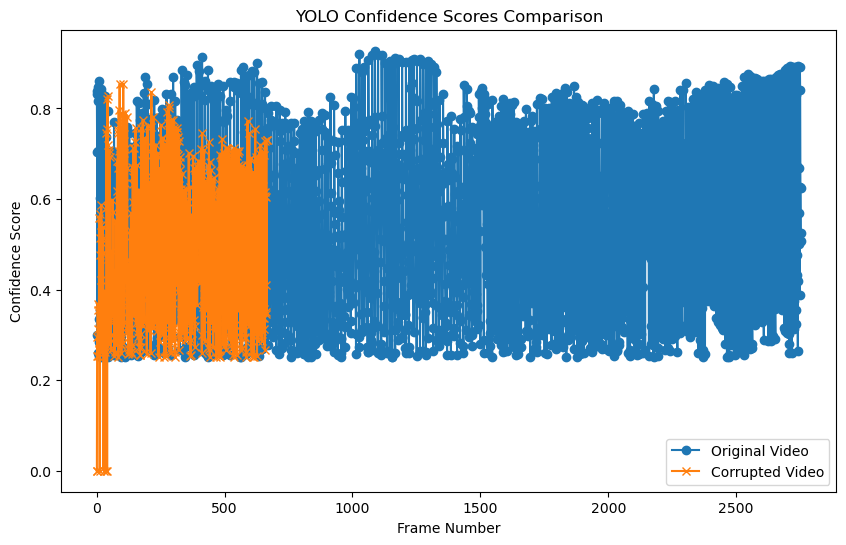

Original Video Stats:
             frame   confidence
count  2755.000000  2755.000000
mean    148.925590     0.534696
std      82.015558     0.187197
min       0.000000     0.250023
25%      81.000000     0.361094
50%     141.000000     0.528484
75%     219.000000     0.702038
max     299.000000     0.927460

Corrupted Video Stats:
            frame  confidence
count  667.000000  667.000000
mean   162.403298    0.479145
std     83.392776    0.170360
min      0.000000    0.000000
25%    100.500000    0.332937
50%    161.000000    0.449908
75%    235.500000    0.637998
max    299.000000    0.854599


In [43]:
# Load logs for analysis
df_original = pd.read_csv('/Users/abhinav/Documents/MS CS/Sem 5 - Fall 2024/src/YOLO_Video/output_logs/logs_original.csv')
df_corrupted = pd.read_csv('/Users/abhinav/Documents/MS CS/Sem 5 - Fall 2024/src/YOLO_Video/output_logs/logs_corrupted_6.csv')

# Plot confidence scores for comparison
plt.figure(figsize=(10, 6))
plt.plot(df_original['confidence'], label='Original Video', marker='o')
plt.plot(df_corrupted['confidence'], label='Corrupted Video', marker='x')
plt.xlabel('Frame Number')
plt.ylabel('Confidence Score')
plt.title('YOLO Confidence Scores Comparison')
plt.legend()
plt.show()

# Calculate basic statistics
print("Original Video Stats:")
print(df_original.describe())

print("\nCorrupted Video Stats:")
print(df_corrupted.describe())


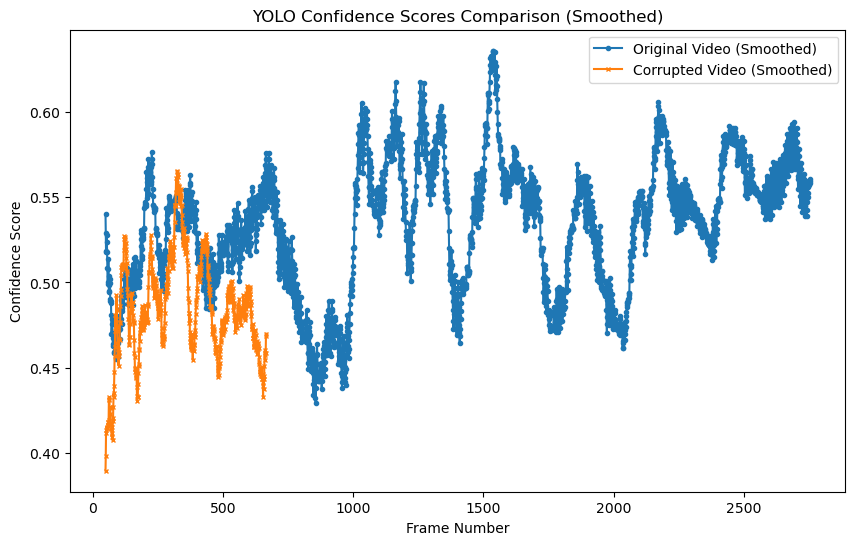

In [45]:
# Smooth the confidence scores with a rolling average (window size of 50 frames)
df_original['smoothed_conf'] = df_original['confidence'].rolling(window=50).mean()
df_corrupted['smoothed_conf'] = df_corrupted['confidence'].rolling(window=50).mean()

# Plot smoothed confidence scores
plt.figure(figsize=(10, 6))
plt.plot(df_original['smoothed_conf'], label='Original Video (Smoothed)', marker='o', markersize=3)
plt.plot(df_corrupted['smoothed_conf'], label='Corrupted Video (Smoothed)', marker='x', markersize=3)
plt.xlabel('Frame Number')
plt.ylabel('Confidence Score')
plt.title('YOLO Confidence Scores Comparison (Smoothed)')
plt.legend()
plt.show()

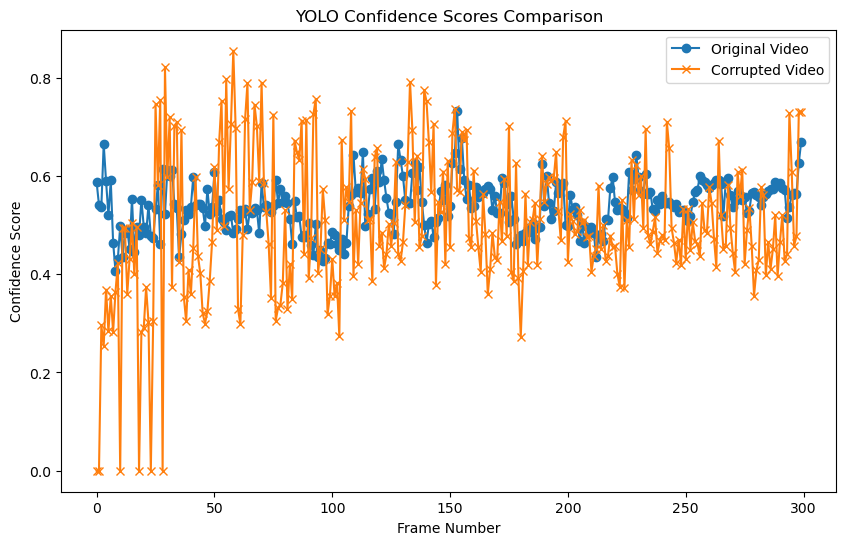

In [46]:
# Plot confidence scores for comparison
plt.figure(figsize=(10, 6))

# For plotting, group by 'frame' and take the average confidence per frame
df_original_grouped = df_original.groupby('frame').mean().reset_index()
df_corrupted_grouped = df_corrupted.groupby('frame').mean().reset_index()

plt.plot(df_original_grouped['frame'], df_original_grouped['confidence'], label='Original Video', marker='o')
plt.plot(df_corrupted_grouped['frame'], df_corrupted_grouped['confidence'], label='Corrupted Video', marker='x')

plt.xlabel('Frame Number')
plt.ylabel('Confidence Score')
plt.title('YOLO Confidence Scores Comparison')
plt.legend()
plt.show()


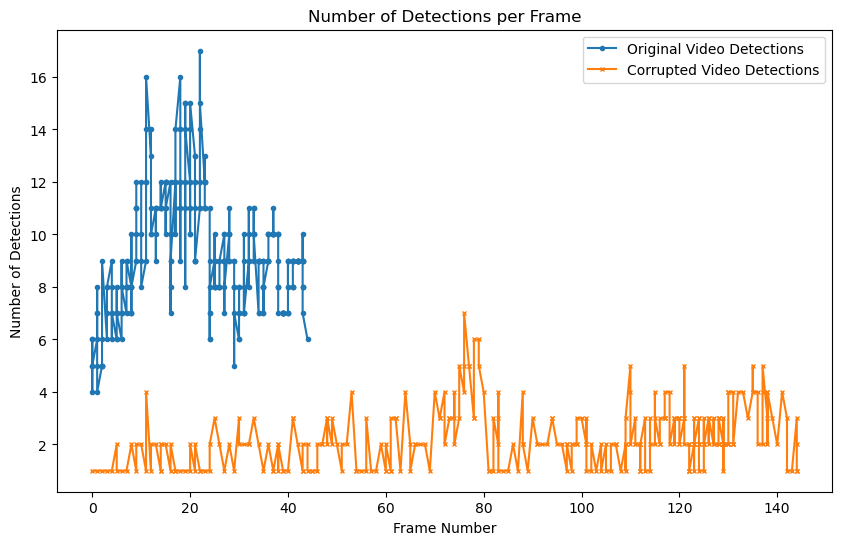

In [49]:
# Count the number of detections per frame
df_original['detections'] = df_original.groupby('frame')['confidence'].count()
df_corrupted['detections'] = df_corrupted.groupby('frame')['confidence'].count()

# Plot number of detections per frame
plt.figure(figsize=(10, 6))
plt.plot(df_original['frame'], df_original['detections'], label='Original Video Detections', marker='o', markersize=3)
plt.plot(df_corrupted['frame'], df_corrupted['detections'], label='Corrupted Video Detections', marker='x', markersize=3)
plt.xlabel('Frame Number')
plt.ylabel('Number of Detections')
plt.title('Number of Detections per Frame')
plt.legend()
plt.show()

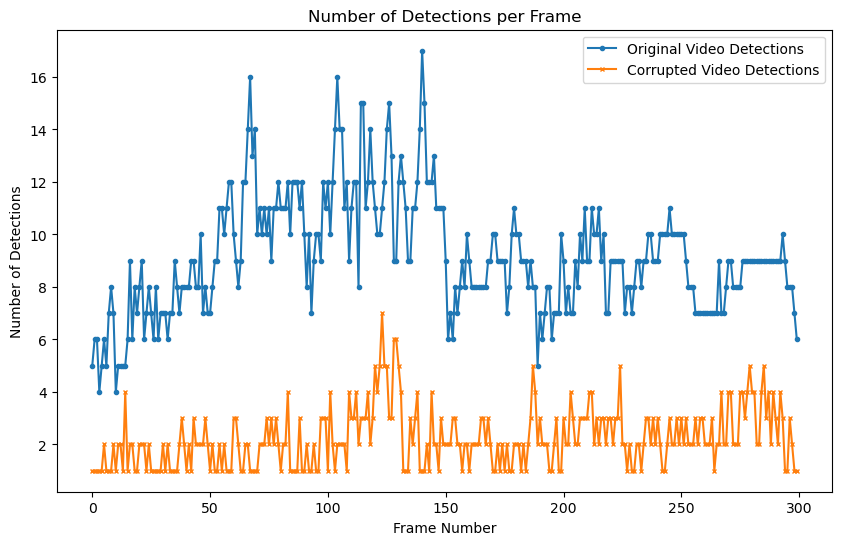

In [50]:
# Create a range of all possible frame numbers (from 0 to the max frame)
all_frames = pd.DataFrame({'frame': range(df_original['frame'].max() + 1)})

# Count the number of detections per frame
df_original_detections = df_original.groupby('frame')['confidence'].count().reset_index(name='detections')
df_corrupted_detections = df_corrupted.groupby('frame')['confidence'].count().reset_index(name='detections')

# Merge with all_frames to ensure every frame is represented, even if no detections
df_original_detections = all_frames.merge(df_original_detections, on='frame', how='left').fillna(0)
df_corrupted_detections = all_frames.merge(df_corrupted_detections, on='frame', how='left').fillna(0)

# Plot number of detections per frame
plt.figure(figsize=(10, 6))
plt.plot(df_original_detections['frame'], df_original_detections['detections'], label='Original Video Detections', marker='o', markersize=3)
plt.plot(df_corrupted_detections['frame'], df_corrupted_detections['detections'], label='Corrupted Video Detections', marker='x', markersize=3)
plt.xlabel('Frame Number')
plt.ylabel('Number of Detections')
plt.title('Number of Detections per Frame')
plt.legend()
plt.show()


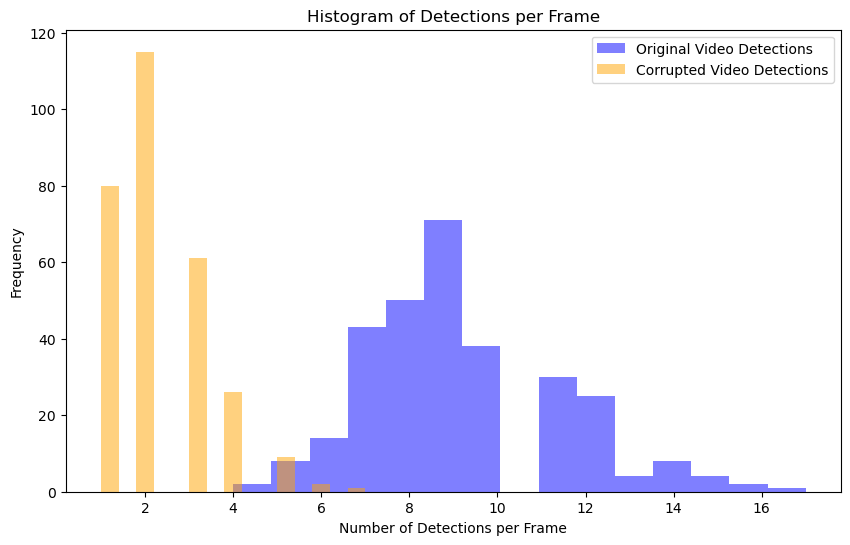

In [19]:
# Plot histogram for number of detections per frame for both original and corrupted videos
plt.figure(figsize=(10, 6))

# Histogram for original video detections
plt.hist(df_original['detections'], bins=15, alpha=0.5, label='Original Video Detections', color='blue')

# Histogram for corrupted video detections
plt.hist(df_corrupted['detections'], bins=15, alpha=0.5, label='Corrupted Video Detections', color='orange')

plt.xlabel('Number of Detections per Frame')
plt.ylabel('Frequency')
plt.title('Histogram of Detections per Frame')
plt.legend()
plt.show()


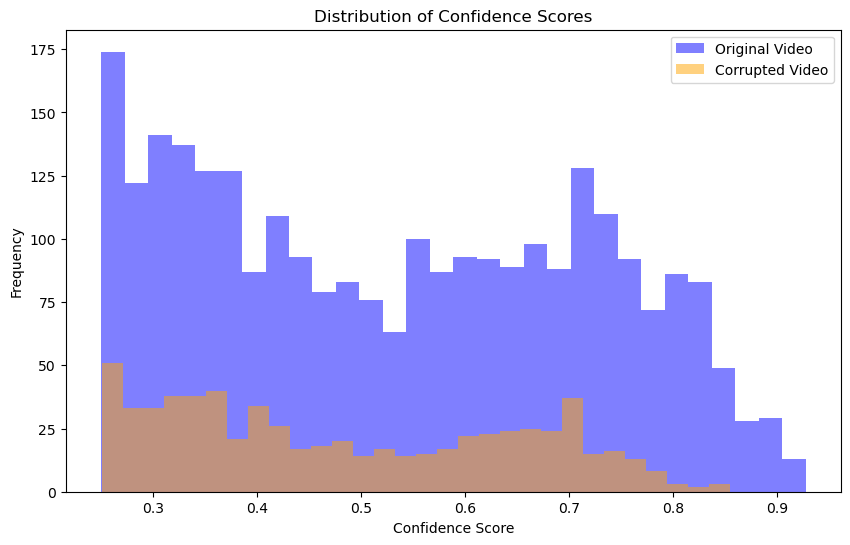

In [12]:
# Plot histogram of confidence scores for original and corrupted videos
plt.figure(figsize=(10, 6))
plt.hist(df_original['confidence'], bins=30, alpha=0.5, label='Original Video', color='blue')
plt.hist(df_corrupted['confidence'], bins=30, alpha=0.5, label='Corrupted Video', color='orange')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence Scores')
plt.legend()
plt.show()


In [14]:
import ast

# Convert the bbox column from string to list format
df_original['bbox'] = df_original['bbox'].apply(lambda x: ast.literal_eval(x))
df_corrupted['bbox'] = df_corrupted['bbox'].apply(lambda x: ast.literal_eval(x))


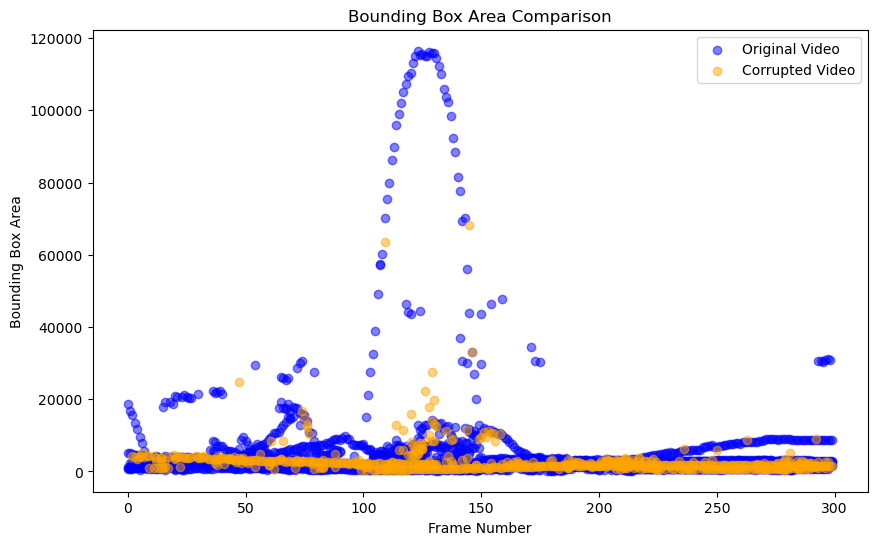

In [16]:
# Calculate bounding box area (width * height) after converting the bbox to lists
df_original['bbox_area'] = (df_original['bbox'].apply(lambda x: x[2] - x[0])) * (df_original['bbox'].apply(lambda x: x[3] - x[1]))
df_corrupted['bbox_area'] = (df_corrupted['bbox'].apply(lambda x: x[2] - x[0])) * (df_corrupted['bbox'].apply(lambda x: x[3] - x[1]))

# Plot bounding box areas
plt.figure(figsize=(10, 6))
plt.scatter(df_original['frame'], df_original['bbox_area'], label='Original Video', alpha=0.5, color='blue')
plt.scatter(df_corrupted['frame'], df_corrupted['bbox_area'], label='Corrupted Video', alpha=0.5, color='orange')
plt.xlabel('Frame Number')
plt.ylabel('Bounding Box Area')
plt.title('Bounding Box Area Comparison')
plt.legend()
plt.show()


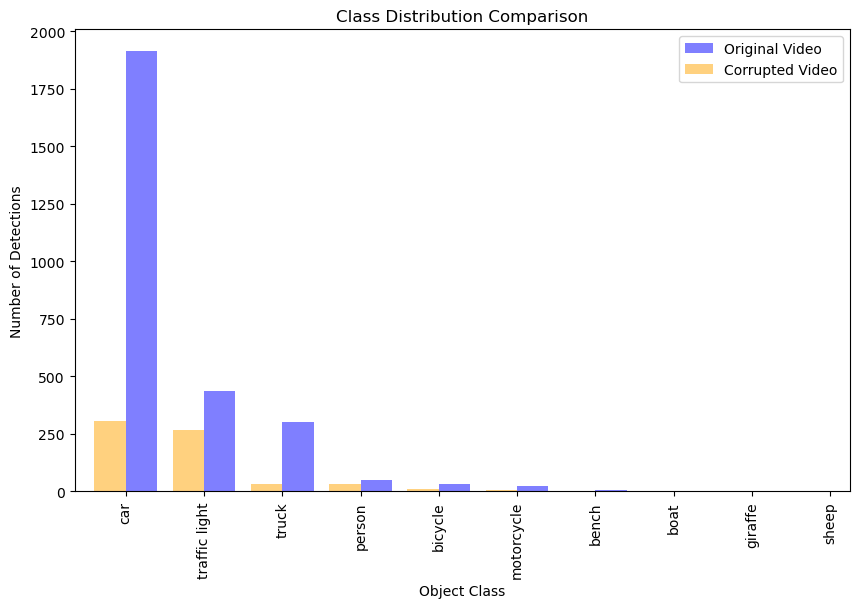

In [17]:
# Count the number of detections per class
class_counts_original = df_original['class'].value_counts()
class_counts_corrupted = df_corrupted['class'].value_counts()

# Plot class distribution
plt.figure(figsize=(10, 6))
class_counts_original.plot(kind='bar', color='blue', alpha=0.5, label='Original Video', width=0.4, position=0)
class_counts_corrupted.plot(kind='bar', color='orange', alpha=0.5, label='Corrupted Video', width=0.4, position=1)
plt.xlabel('Object Class')
plt.ylabel('Number of Detections')
plt.title('Class Distribution Comparison')
plt.legend()
plt.show()
